<a href="https://colab.research.google.com/github/fatmamoussa/chomage-en-grand-tunis-R/blob/main/ProjetR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
install.packages(c("tidyverse","survey","janitor","skimr"))


Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [16]:
# installer / charger les paquets
if (!require(googledrive)) install.packages("googledrive")
if (!require(readr)) install.packages("readr")

library(googledrive)
library(readr)

# si le fichier est partagé publiquement (ou accessible avec ton compte) :
drive_deauth()   # si le fichier est public; sinon, omettre ou authentifier
file_id <- "https://drive.google.com/file/d/1FkjjDM4ZNBNGBbPBkoQ-e5B09ErKcAOp/view?usp=sharing"  # l’ID de ton lien
public_file <- drive_get(as_id(file_id))

# Télécharger le fichier localement (optionnel mais simple)
drive_download(public_file, path = "Data_T4_2023.csv", overwrite = TRUE)

# Lire en tant que dataframe
df <- read_csv("Data_T4_2023.csv", show_col_types = FALSE)



File downloaded:

• Data_T4_2023.csv <id: 1FkjjDM4ZNBNGBbPBkoQ-e5B09ErKcAOp>

Saved locally as:

• Data_T4_2023.csv



In [17]:

summary(df)



   Y_Quarter          Year         Quarter     Region              HH_Id     
 Min.   :20234   Min.   :2023   Min.   :4   Length:67444       Min.   :   1  
 1st Qu.:20234   1st Qu.:2023   1st Qu.:4   Class :character   1st Qu.: 717  
 Median :20234   Median :2023   Median :4   Mode  :character   Median :1413  
 Mean   :20234   Mean   :2023   Mean   :4                      Mean   :1444  
 3rd Qu.:20234   3rd Qu.:2023   3rd Qu.:4                      3rd Qu.:2089  
 Max.   :20234   Max.   :2023   Max.   :4                      Max.   :3678  
                                                                             
 Member_Number    Relationship          Gender               Age        
 Min.   : 1.000   Length:67444       Length:67444       Min.   :  0.00  
 1st Qu.: 1.000   Class :character   Class :character   1st Qu.: 15.00  
 Median : 2.000   Mode  :character   Mode  :character   Median : 35.00  
 Mean   : 2.599                                         Mean   : 35.78  
 3rd Qu.: 4

In [18]:
colnames(df)


[1] "Y_Quarter"                "Year"                    
 [3] "Quarter"                  "Region"                  
 [5] "HH_Id"                    "Member_Number"           
 [7] "Relationship"             "Gender"                  
 [9] "Age"                      "Civil_Status"            
[11] "Attend_edu_trai_cycle"    "Edu_cycle"               
[13] "Edu_Year"                 "Literacy"                
[15] "Educa_Level"              "Edu_Comp_Year"           
[17] "Edu_Degr_Diploma"         "Year_Of_Diploma"         
[19] "Unstructured_Educational" "Paid_Work_7d"            
[21] "Unpaid_Work"              "Agric_Work"              
[23] "Sale_or_Self_cons"        "Reason_Not_Work"         
[25] "Look_for_Work"            "Procedure_Look"          
[27] "Reason_Not_Looking"       "Desire_to_Work"          
[29] "Ready_Available"          "Class_Activity"          
[31] "Workplace"                "Occupation"              
[33] "Status_Work"              "Social_Fund"             
[35] "Environment"              "Sector_of_Activity_2"    
[37] "Sector_of_Activity"       "Diploma_Agg"             
[39] "High_Diploma"             "hh_size"                 
[41] "Weight"

Taux de chômage selon Région

In [19]:
library(dplyr)

# Filtrer population active (employed + unemployed)
active <- df %>% filter(Status_Work %in% c(1,2))

# Taux de chômage par région
chomage_region <- active %>%
  group_by(Region) %>%
  summarise(
    Population_Active = n(),
    Chomeurs = sum(Status_Work == 2, na.rm=TRUE),
    Taux_Chomage = round(100 * Chomeurs / Population_Active, 2)
  )

chomage_region



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Region,Population_Active,Chomeurs,Taux_Chomage
<chr>,<int>,<int>,<dbl>
Central East,742,537,72.37
Central West,913,771,84.45
Grand Tunis,473,357,75.48
North East (Excluding Grand Tunis),560,407,72.68
North West,884,741,83.82
South East,534,413,77.34
South West,504,432,85.71


Taux d’activité par région (hommes/femmes)


Taux d’activité hommes / femmes

In [20]:
# Population 15 ans et plus
pop_15plus <- df %>% filter(Age >= 15)

taux_activite <- pop_15plus %>%
  group_by(Gender) %>%
  summarise(
    Population_15plus = n(),
    Population_Active = sum(Status_Work %in% c(1,2), na.rm=TRUE),
    Taux_Activite = round(100 * Population_Active / Population_15plus,2)
  )

taux_activite


Gender,Population_15plus,Population_Active,Taux_Activite
<chr>,<int>,<int>,<dbl>
1.Male,24378,3943,16.17
2.Female,26771,667,2.49


In [21]:
library(dplyr)
library(ggplot2)

# On travaille sur population 15+
pop_15plus <- df %>% filter(Age >= 15)

# Calcul du taux d'activité par ménage et par genre
taux_activite_hh <- pop_15plus %>%
  group_by(HH_Id, Gender) %>%
  summarise(
    Population_15plus = n(),
    Population_Active = sum(Status_Work %in% c(1,2), na.rm=TRUE),
    Taux_Activite = Population_Active / Population_15plus
  ) %>%
  ungroup()


`summarise()` has grouped output by 'HH_Id'. You can override using the
`.groups` argument.


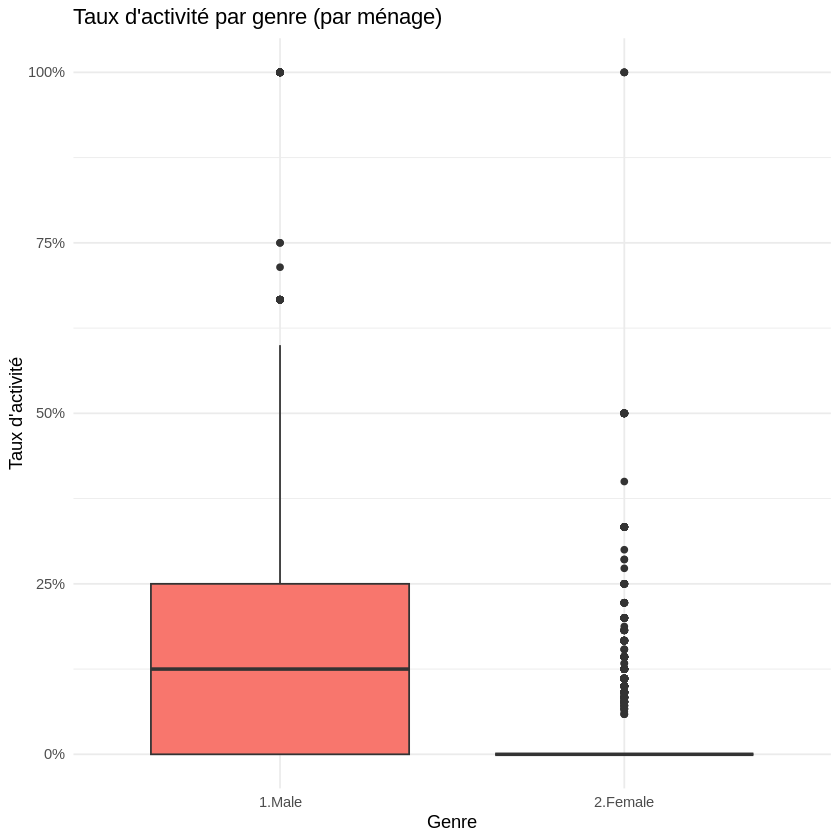

In [22]:
ggplot(taux_activite_hh, aes(x = Gender, y = Taux_Activite, fill = Gender)) +
  geom_boxplot() +
  scale_y_continuous(labels = scales::percent) +
  labs(
    title = "Taux d'activité par genre (par ménage)",
    x = "Genre",
    y = "Taux d'activité"
  ) +
  theme_minimal() +
  theme(legend.position = "none")


Chômage selon niveau d’éducation

In [23]:
chomage_education <- df %>%
  filter(Status_Work %in% c(1,2)) %>%
  group_by(Educa_Level) %>%
  summarise(
    Population_Active = n(),
    Chomeurs = sum(Status_Work == 2, na.rm=TRUE),
    Taux_Chomage = round(100 * Chomeurs / Population_Active,2)
  )

chomage_education


Educa_Level,Population_Active,Chomeurs,Taux_Chomage
<chr>,<int>,<int>,<dbl>
0.Nothing,2,1,50.00
1.Koranic School,24,22,91.67
2.Primary School (Old System),1492,1251,83.85
3.Secondary School (Old System),1104,835,75.63
4.Vocational Education (preparatory),34,24,70.59
5.Basic school,745,635,85.23
6.Secondary School (New),438,336,76.71
7.Public Higher Education,374,183,48.93
8.Private Higher Education,1,1,100.00


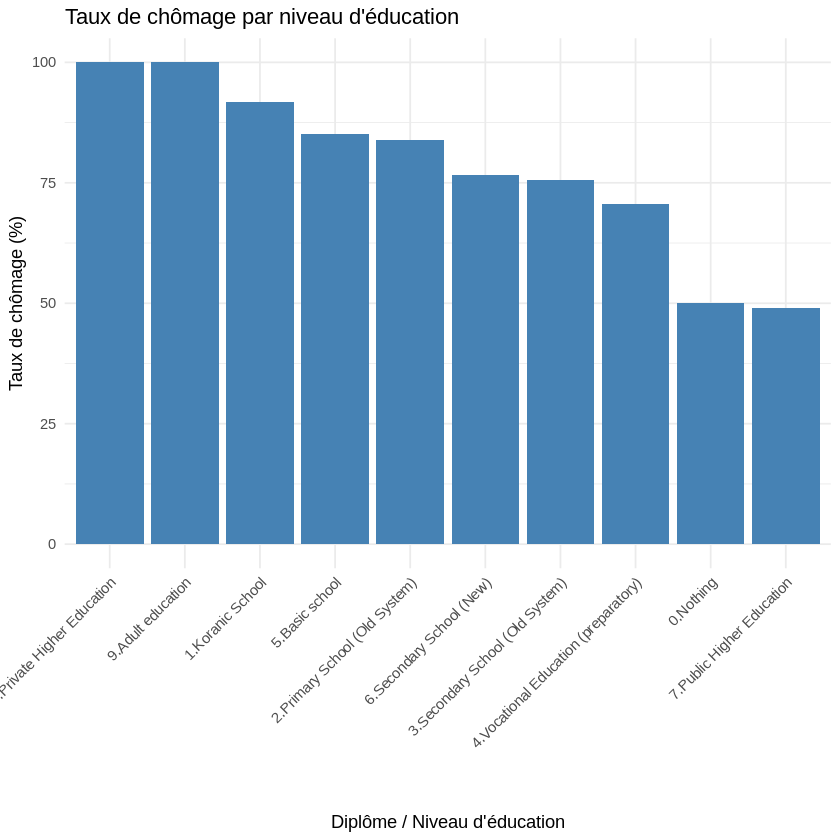

In [24]:
# Assurer que la colonne Chomeur existe
pop_15plus <- pop_15plus %>%
  mutate(Chomeur = ifelse(Status_Work == 2, 1, 0),
         Actif = ifelse(Status_Work %in% c(1,2), 1, 0))

# Calcul du chômage par diplôme
chomage_diplome <- pop_15plus %>%
  filter(!is.na(Educa_Level) & Educa_Level != "") %>%  # exclure valeurs manquantes
  group_by(Educa_Level) %>%
  summarise(
    Population_Active = sum(Actif, na.rm = TRUE),
    Chomeurs = sum(Chomeur, na.rm = TRUE),
    Taux_Chomage = round(100 * Chomeurs / Population_Active, 2)
  )

# Graphique
ggplot(chomage_diplome, aes(x=reorder(Educa_Level, -Taux_Chomage), y=Taux_Chomage)) +
  geom_bar(stat="identity", fill="steelblue") +
  labs(title="Taux de chômage par niveau d'éducation", x="Diplôme / Niveau d'éducation", y="Taux de chômage (%)") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle=45, hjust=1))


Chômage selon Secteur d’activité


In [25]:
chomage_secteur <- df %>%
  filter(Status_Work %in% c(1,2)) %>%
  group_by(Sector_of_Activity) %>%
  summarise(
    Population_Active = n(),
    Chomeurs = sum(Status_Work == 2, na.rm=TRUE),
    Taux_Chomage = round(100 * Chomeurs / Population_Active,2)
  )

chomage_secteur


Sector_of_Activity,Population_Active,Chomeurs,Taux_Chomage
<chr>,<int>,<int>,<dbl>
"1 - AGRICULTURE, FORESTRY, AND FISHING",1592,1328,83.42
10 - INFORMATION AND COMMUNICATION,14,9,64.29
11 - FINANCIAL AND INSURANCE ACTIVITIES,5,3,60.00
12 - REAL ESTATE ACTIVITIES,13,12,92.31
"13 - PROFESSIONAL, SCIENTIFIC AND TECHNICAL ACTIVITIES",62,27,43.55
14 - ADMINISTRATIVE AND SUPPORT SERVICE ACTIVITIES,20,11,55.00
15 - PUBLIC ADMINISTRATION AND DEFENSE; COMPULSORY SOCIAL SECURITY,1,0,0.00
16 - EDUCATION,64,38,59.38
17 - HUMAN HEALTH AND SOCIAL WORK ACTIVITIES,38,4,10.53


chômage par âge

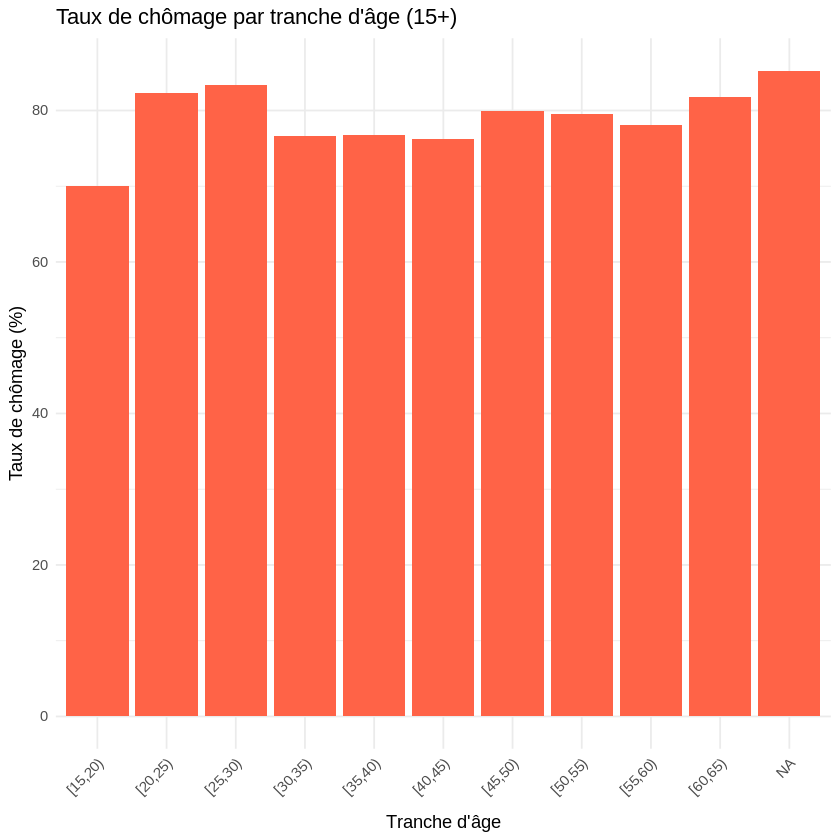

In [26]:
# Créer colonnes Actif et Chomeur
pop_15plus <- pop_15plus %>%
  mutate(
    Chomeur = ifelse(Status_Work == 2, 1, 0),   # 2 = chômeur
    Actif = ifelse(Status_Work %in% c(1,2), 1, 0)  # 1 ou 2 = actif
  )

# Créer des tranches d'âge
pop_15plus <- pop_15plus %>%
  mutate(Age_group = cut(Age, breaks = seq(15, 65, by = 5), right = FALSE))

# Taux de chômage par tranche d'âge
chomage_age <- pop_15plus %>%
  group_by(Age_group) %>%
  summarise(
    Population_Active = sum(Actif, na.rm = TRUE),
    Chomeurs = sum(Chomeur, na.rm = TRUE),
    Taux_Chomage = round(100 * Chomeurs / Population_Active, 2)
  )

# Graphique
ggplot(chomage_age, aes(x = Age_group, y = Taux_Chomage)) +
  geom_bar(stat = "identity", fill = "tomato") +
  labs(
    title = "Taux de chômage par tranche d'âge (15+)",
    x = "Tranche d'âge",
    y = "Taux de chômage (%)"
  ) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))
